In [115]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [116]:
# evalys requires pandas==0.25.3
# %matplotlib inline
from pandas import read_csv
import matplotlib
# import matplotlib.pyplot as plt
from evalys.jobset import JobSet

In [117]:
schedule = read_csv("../output/out_schedule.csv")
schedule.T

,0
batsim_version,3.1.0
consumed_joules,0
makespan,1141.38
max_slowdown,7.0048
max_turnaround_time,227.378
max_waiting_time,137.351
mean_slowdown,4.04096
mean_turnaround_time,35.5595
mean_waiting_time,2.7225
nb_computing_machines,161


In [118]:
js = JobSet.from_csv("../output/out_jobs.csv")
js.df

,jobID,workload_name,profile,submission_time,requested_number_of_resources,requested_time,success,final_state,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,allocated_resources,consumed_energy,metadata,proc_alloc
0,0,w0,0,11.000000,6,1000.0,1,COMPLETED_SUCCESSFULLY,11.000090,85.424656,96.424746,0.000090,85.424746,1.000001,"[0, 1, 2, 3, 4, 5]",-1.0,NaN,6
1,0_in_128,w0,0_w0!0_in_128,11.000015,1,-1.0,1,COMPLETED_SUCCESSFULLY,11.000060,0.000010,11.000070,0.000045,0.000055,5.503200,"[128, 160]",-1.0,NaN,2
2,0_out_128,w0,0_w0!0_out_128,96.424846,1,-1.0,1,COMPLETED_SUCCESSFULLY,96.424891,0.000010,96.424901,0.000045,0.000055,5.502400,"[128, 160]",-1.0,NaN,2
3,1,w0,1,13.000000,2,1000.0,1,COMPLETED_SUCCESSFULLY,13.000105,114.147188,127.147293,0.000105,114.147293,1.000001,"[6, 7]",-1.0,NaN,2
4,10,w0,10,100.000000,4,1000.0,1,COMPLETED_SUCCESSFULLY,100.000105,110.328757,210.328862,0.000105,110.328862,1.000001,"[0, 1, 2, 3]",-1.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,99,w0,99,917.000000,5,1000.0,1,COMPLETED_SUCCESSFULLY,917.000120,94.954146,1011.954266,0.000120,94.954266,1.000001,"[82, 87, 88, 89, 90]",-1.0,NaN,5
296,99_in_128,w0,99_w0!99_in_128,917.000030,1,-1.0,1,COMPLETED_SUCCESSFULLY,917.000090,0.000010,917.000100,0.000060,0.000070,7.004800,"[128, 160]",-1.0,NaN,2
297,99_out_128,w0,99_w0!99_out_128,1011.954366,1,-1.0,1,COMPLETED_SUCCESSFULLY,1011.954411,0.000010,1011.954421,0.000045,0.000055,5.517500,"[128, 160]",-1.0,NaN,2
298,9_in_128,w0,9_w0!9_in_128,97.000030,1,-1.0,1,COMPLETED_SUCCESSFULLY,97.000075,0.000010,97.000085,0.000045,0.000055,5.504000,"[128, 160]",-1.0,NaN,2


In [119]:
js.df.describe()

,submission_time,requested_number_of_resources,requested_time,success,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,consumed_energy,metadata,proc_alloc
count,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000
mean,485.189553,4.563333,332.666667,1.0,487.912051,32.837048,520.749099,2.722498,35.559546,4.040956,-1.0,NaN,5.230000
std,279.327071,8.622867,472.664357,0.0,280.882761,47.877225,281.679048,13.694175,53.057744,2.097849,0.0,NaN,8.355226
min,11.000000,1.000000,-1.000000,1.0,11.000060,0.000010,11.000070,0.000045,0.000055,1.000001,-1.0,NaN,1.000000
25%,240.000023,1.000000,-1.000000,1.0,242.250082,0.000010,277.140255,0.000045,0.000055,1.013812,-1.0,NaN,2.000000
50%,470.873292,1.000000,-1.000000,1.0,472.000090,0.000010,502.957346,0.000045,0.000055,5.502400,-1.0,NaN,2.000000
75%,729.000008,4.000000,1000.000000,1.0,729.000083,84.409203,762.154018,0.000105,85.886650,5.504000,-1.0,NaN,4.000000
max,1141.378227,63.000000,1000.000000,1.0,1141.378272,157.854336,1141.378282,137.351074,227.378127,7.004800,-1.0,NaN,63.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14b025040>,
      dtype=object)

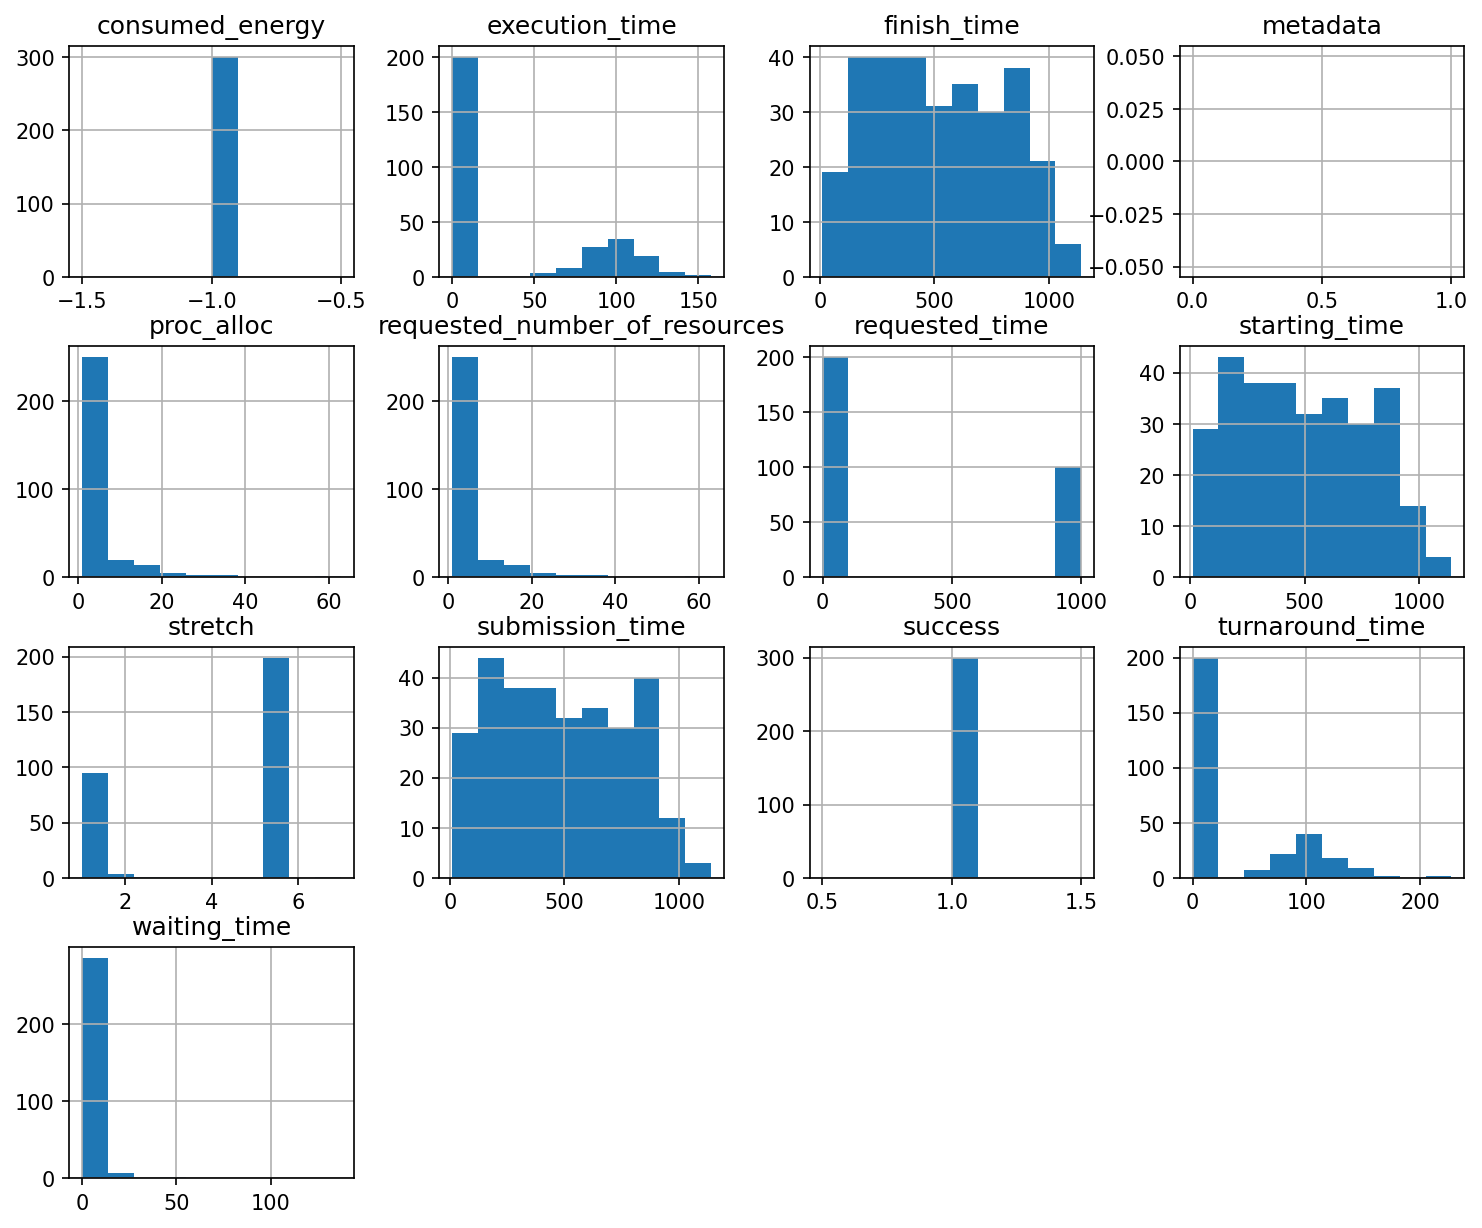

In [120]:
js.df.hist()

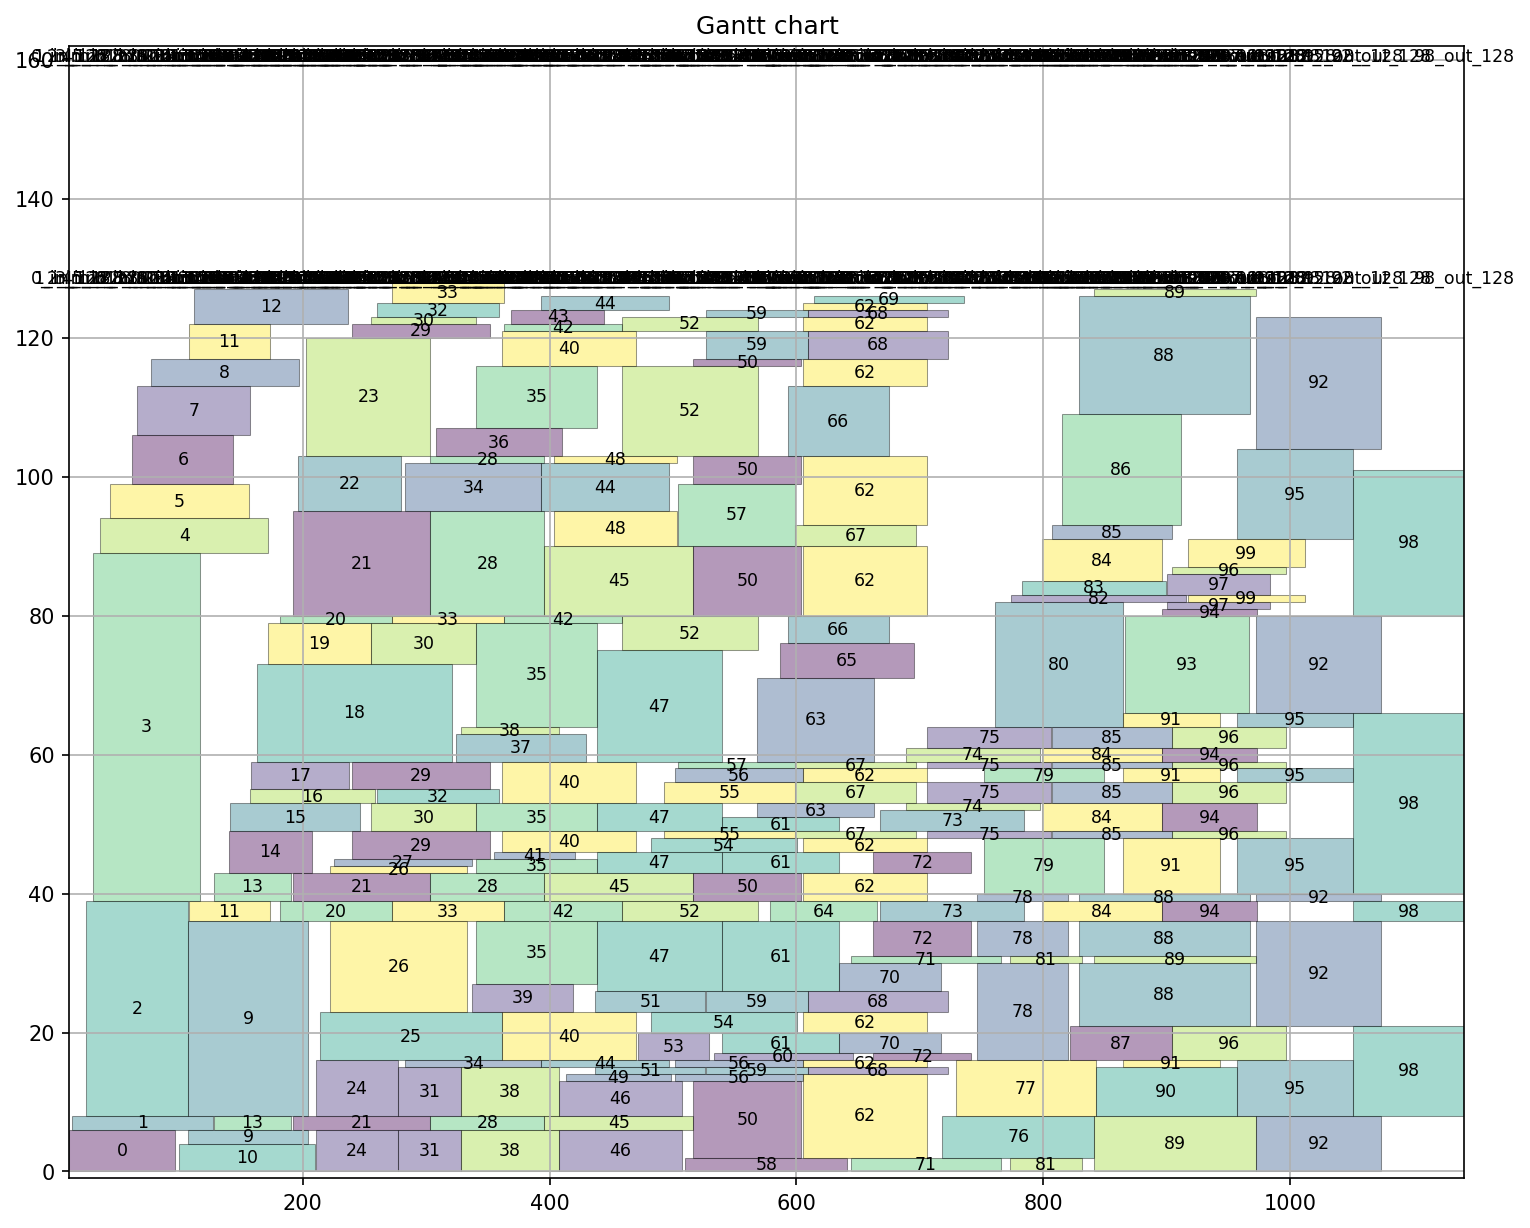

In [121]:
js.gantt()

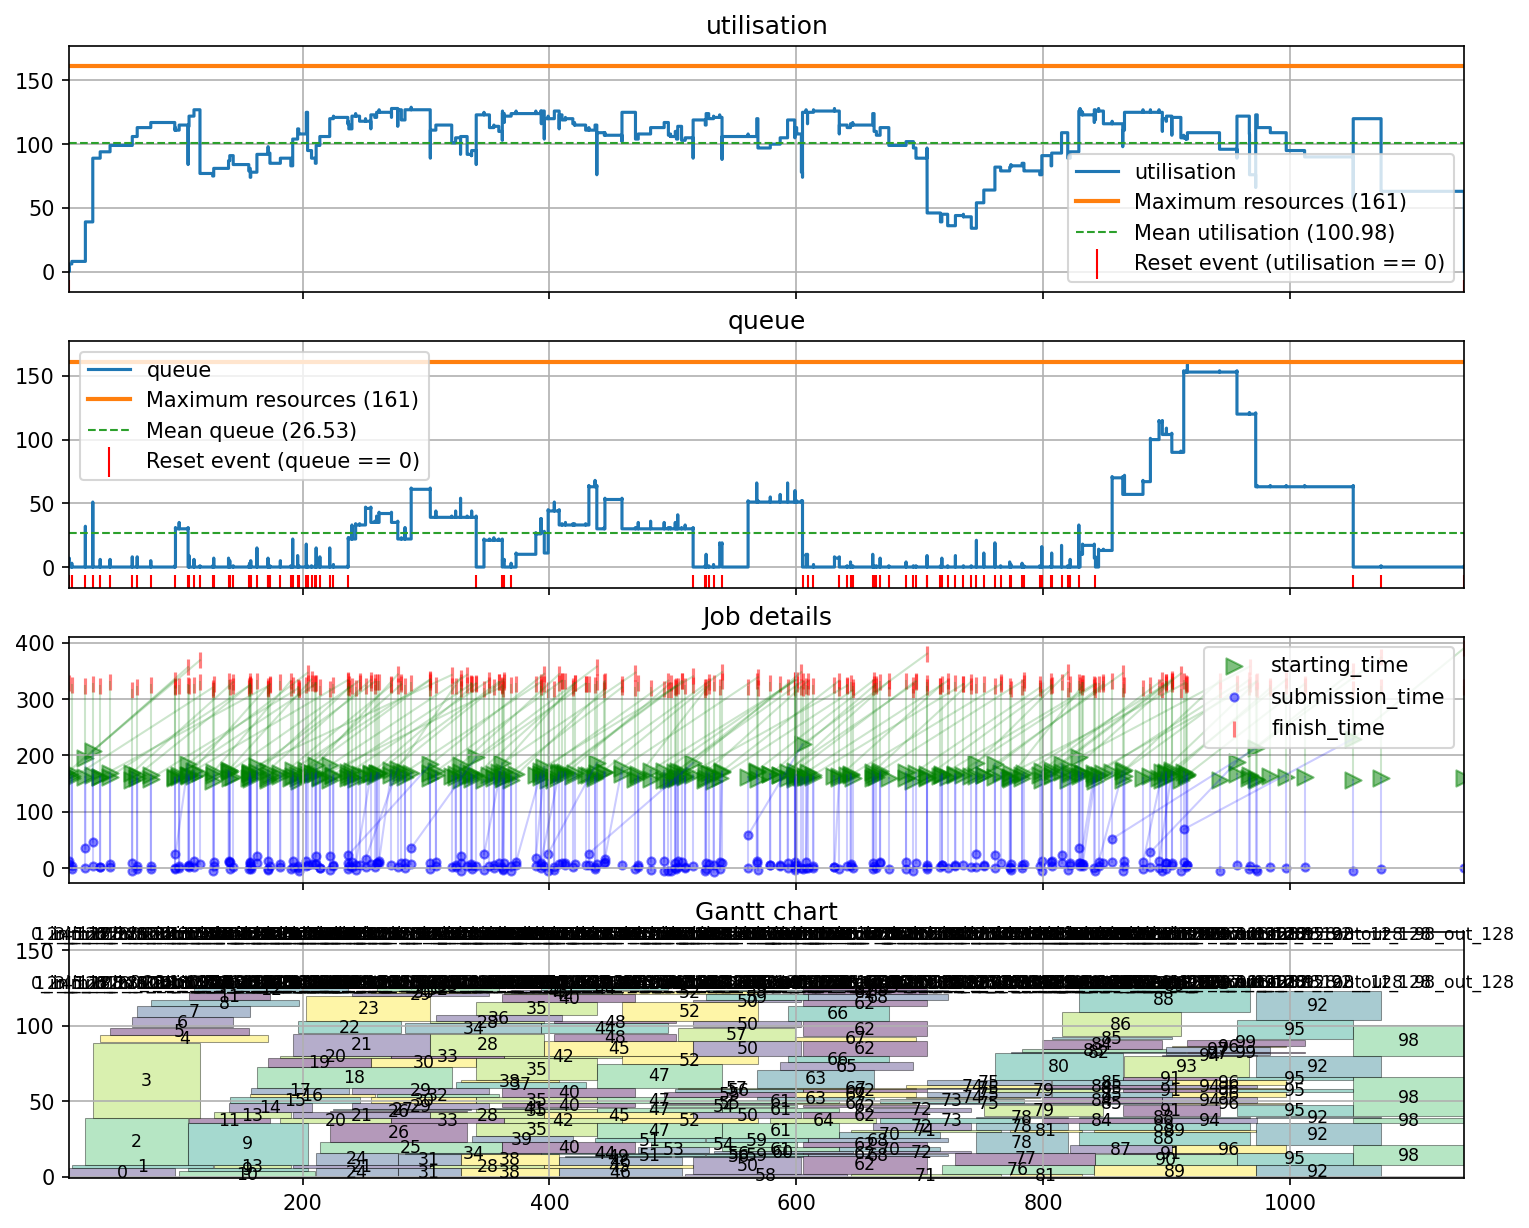

In [122]:
matplotlib.rcParams['figure.figsize'] = 12, 10
matplotlib.rcParams['figure.dpi']= 150
js.plot(with_details=True)